In [17]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
data = input_data.read_data_sets('data1',one_hot=True)

Extracting data1\train-images-idx3-ubyte.gz
Extracting data1\train-labels-idx1-ubyte.gz
Extracting data1\t10k-images-idx3-ubyte.gz
Extracting data1\t10k-labels-idx1-ubyte.gz


In [18]:
print("Fashion MNIST:")
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))
print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))

Fashion MNIST:
Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [19]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

y = 3 (Dress)


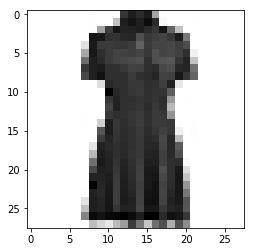

y = 7 (Sneaker)


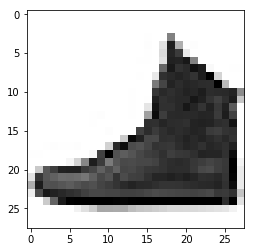

In [20]:

sample_1 = data.train.images[47].reshape(28,28)
sample_label_1 = np.where(data.train.labels[47] == 1)[0][0]

sample_2 = data.train.images[23].reshape(28,28)
sample_label_2 = np.where(data.train.labels[23] == 1)[0][0]

print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')
plt.show()

print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')
plt.show()

In [8]:
def cov2d(x_tensor,conv_num_outputs,conv_ksize,conv_strides):
    weights=tf.Variable(tf.truncated_normal(shape=[conv_ksize[0],conv_ksize[1],int(x_tensor.shape[3]),conv_num_outputs],mean=0,stddev=0.1,
                                            dtype=tf.float32))
    biases=tf.Variable(tf.zeros(conv_num_outputs))
    layer=tf.nn.conv2d(x_tensor,weights,strides=[1,conv_strides[0],conv_strides[1],
    1],padding='SAME')
    layer=tf.nn.bias_add(layer,biases)
    layer=tf.nn.relu(layer)
    return layer

def maxpool(x_tensor,pool_ksize, pool_strides):
    layer=tf.nn.max_pool(x_tensor,ksize=[1,pool_ksize[0],pool_ksize[1],1],padding='SAME',
    strides=[1,pool_strides[0],pool_strides[1],1])
    return layer

In [6]:
def flatten(x_tensor):

    x_tensor_shape=x_tensor.get_shape().as_list()
    return tf.reshape(x_tensor,shape=[-1,x_tensor_shape[1]*x_tensor_shape[2]*x_tensor_shape[3]])



In [7]:
def fully_conn(x_tensor, num_outputs):

    x_tensor_shape=x_tensor.get_shape().as_list()
    weights=tf.Variable(tf.truncated_normal(shape=[x_tensor_shape[1],num_outputs],mean=0,
                                            stddev=0.1,dtype=tf.float32))
    biases=tf.Variable(tf.zeros(num_outputs))
    return tf.nn.relu(tf.nn.bias_add(tf.matmul(x_tensor,weights),biases))



In [8]:
def output(x_tensor, num_outputs):
    shape=x_tensor.get_shape().as_list()
    weights=tf.Variable(tf.truncated_normal(shape=[shape[1],num_outputs],mean=0,stddev=0.01,dtype=tf.float32))
    biases=tf.Variable(tf.zeros(num_outputs))
    
    return tf.nn.bias_add(tf.matmul(x_tensor,weights),biases)



In [9]:

def conv_net(x, keep_prob):

    conv_layer=cov2d(x_tensor=x,conv_num_outputs=64,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=cov2d(x_tensor=conv_layer,conv_num_outputs=64,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=maxpool(x_tensor=conv_layer,pool_ksize=(2,2), pool_strides=(2,2))
    
    conv_layer=cov2d(x_tensor=conv_layer,conv_num_outputs=128,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=cov2d(x_tensor=conv_layer,conv_num_outputs=128,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=maxpool(x_tensor=conv_layer,pool_ksize=(2,2), pool_strides=(2,2))

    conv_layer=cov2d(x_tensor=conv_layer,conv_num_outputs=256,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=cov2d(x_tensor=conv_layer,conv_num_outputs=256,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=cov2d(x_tensor=conv_layer,conv_num_outputs=256,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=maxpool(x_tensor=conv_layer,pool_ksize=(2,2), pool_strides=(2,2))
    
    conv_layer=cov2d(x_tensor=conv_layer,conv_num_outputs=512,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=cov2d(x_tensor=conv_layer,conv_num_outputs=512,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=cov2d(x_tensor=conv_layer,conv_num_outputs=512,conv_ksize=(3,3),conv_strides=(1,1))
    conv_layer=maxpool(x_tensor=conv_layer,pool_ksize=(2,2), pool_strides=(2,2))
    
    conv_layer_flat=flatten(conv_layer)


    fully_con_layer=fully_conn(conv_layer_flat,4096)

    fully_con_layer=fully_conn(fully_con_layer,4096)
    fully_con_layer=tf.nn.dropout(fully_con_layer,keep_prob=keep_prob)

    conv_output=output(fully_con_layer,10)

    return conv_output


tf.reset_default_graph()


x=tf.placeholder(shape=[None,28,28,1],dtype=tf.float32,name='x')
y=tf.placeholder(shape=[None,10],dtype=tf.float32,name='y')
keep_prob=tf.placeholder(dtype=tf.float32,name='keep_prob')

logits = conv_net(x, keep_prob)
logits = tf.identity(logits, name='logits')

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.002).minimize(cost)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [10]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):


    session.run(optimizer,feed_dict={x:feature_batch,y:label_batch,keep_prob:keep_probability})
 

In [11]:
valid_images=np.reshape(data.test.images,[10000,28,28,1])[:1000]
valid_labels=np.reshape(data.test.labels,[10000,10])[:1000]

In [12]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):


    Loss=session.run(cost,feed_dict={x:feature_batch,y:label_batch,keep_prob:1.0})
    Accuracy=session.run(accuracy,feed_dict={x:valid_images,y:valid_labels,keep_prob:1.0})
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(Loss,Accuracy))
    
    

In [13]:

epochs = 40
batch_size = 256
keep_probability = 0.5

In [ ]:
model_path= './fashion_mnist_classification'
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        num_minibatches = int(55000 / batch_size)
        for i in range(num_minibatches):

            batch_X, batch_Y = data.train.next_batch(batch_size)

            train_neural_network(sess, optimizer, keep_probability, np.reshape(batch_X,[batch_size,28,28,1]), 
                                 batch_Y)
        print('Epoch {:>2}, '.format(epoch + 1), end='')
        print_stats(sess,np.reshape(batch_X,[batch_size,28,28,1]), batch_Y, cost, accuracy)
    saver = tf.train.Saver()
    save_path = saver.save(sess, model_path)




Epoch  1, Loss:     0.3724 Validation Accuracy: 0.833000
Epoch  2, Loss:     0.4008 Validation Accuracy: 0.864000
Epoch  3, Loss:     0.3154 Validation Accuracy: 0.859000
Epoch  4, Loss:     0.2365 Validation Accuracy: 0.887000
Epoch  5, Loss:     0.2282 Validation Accuracy: 0.879000
Epoch  6, Loss:     0.2852 Validation Accuracy: 0.886000
Epoch  7, Loss:     0.2166 Validation Accuracy: 0.884000
Epoch  8, Loss:     0.1955 Validation Accuracy: 0.888000
Epoch  9, Loss:     0.1614 Validation Accuracy: 0.882000
Epoch 10, Loss:     0.2195 Validation Accuracy: 0.884000
Epoch 11, Loss:     0.2158 Validation Accuracy: 0.891000
Epoch 12, Loss:     0.2171 Validation Accuracy: 0.865000
Epoch 13, Loss:     0.1921 Validation Accuracy: 0.880000
Epoch 14, Loss:     0.1283 Validation Accuracy: 0.892000
Epoch 15, Loss:     0.1471 Validation Accuracy: 0.893000
Epoch 16, Loss:     0.1150 Validation Accuracy: 0.911000
Epoch 17, Loss:     0.0927 Validation Accuracy: 0.892000
Epoch 18, Loss:     0.1152 Vali

In [14]:
loaded_graph = tf.Graph()
model_path= './fashion_mnist_classification'
with tf.Session(graph=loaded_graph) as sess:

    loader = tf.train.import_meta_graph(model_path + '.meta')
    loader.restore(sess, model_path)
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')

    Train_batch_acc_total = 0
    Test_batch_acc_total=0

    for i in range(55):
        batch_X, batch_Y = data.train.next_batch(1000)
        Train_batch_acc_total += sess.run(loaded_acc,feed_dict={loaded_x: np.reshape(batch_X,[1000,28,28,1]), loaded_y: batch_Y, loaded_keep_prob: 1.0})

    print('Training Accuracy: {}\n'.format(Train_batch_acc_total/55))
    
    for i in range(10):
        batch_X, batch_Y = data.test.next_batch(1000)
        Test_batch_acc_total += sess.run(loaded_acc,feed_dict={loaded_x: np.reshape(batch_X,[1000,28,28,1]), loaded_y: batch_Y, loaded_keep_prob: 1.0})

    print('Testing Accuracy: {}\n'.format(Test_batch_acc_total/10))
    


INFO:tensorflow:Restoring parameters from ./fashion_mnist_classification
Training Accuracy: 0.9533454483205622

Testing Accuracy: 0.9047999978065491

